In [1]:
from mlgrad.risk import ERisk, ERiskGB
from mlgrad.loss import SquareErrorLoss
from mlgrad.model import LinearFuncModel, SigmaNeuronModel, FFNetworkModel, \
                        FFNetworkFuncModel, SigmaNeuronModelLayer, LinearModel
from mlgrad.func import SoftPlus, Sqrt, Sigmoidal, HingeSqrt, Arctang

from mlgrad import erm_fg, erm_irgd, fg, erm_fg, erisk
from mlgrad.regr import m_regression_irls
from mlgrad.af import averaging_function
from mlgrad.weights import MWeights

import numpy as np

In [2]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

In [3]:
X, Y = datasets.load_breast_cancer(return_X_y=True)
N = len(X)
Y = 2.0*Y-1.0
print(X.shape, X.dtype)
print(Y.shape, Y.dtype)

(569, 30) float64
(569,) float64


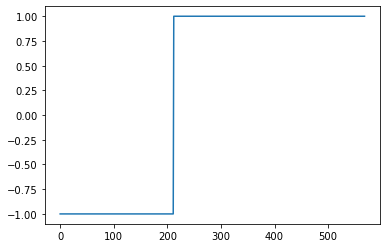

In [4]:
plt.plot(sorted(Y))
plt.show()

In [5]:
X_o = preprocessing.scale(X)
Y_o = Y.copy()

In [6]:
from mlgrad.boost.gb_classification import gb_fit, gb_fit_agg

def new_model(n):
    mod = SigmaNeuronModel(Sigmoidal(), n)
    mod.init_param()
    return mod

m = 50

In [7]:
gb = gb_fit(X_o, Y_o, new_model, h=0.01, n_iter=m)
lfm, lvals = gb.complex_model, gb.lvals

In [8]:
alpha=0.97
gb_agg = gb_fit_agg(X_o, Y_o, new_model, aggname='WM', alpha=alpha, h=0.01, n_iter=m)
lfm_agg, lvals_agg = gb_agg.complex_model, gb_agg.lvals

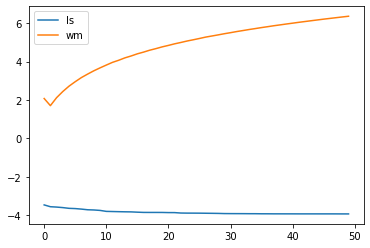

In [9]:
plt.plot(np.log(lvals), label='ls')
plt.plot(np.log(lvals_agg), label='wm')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


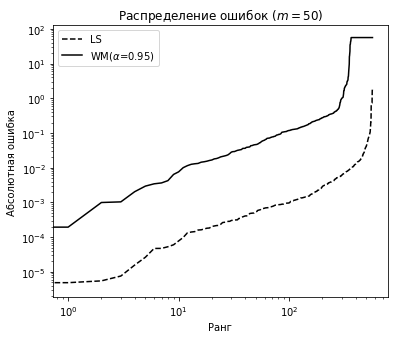

In [10]:
plt.figure(figsize=(6,5))
plt.xlabel('Ранг')
plt.ylabel('Абсолютная ошибка')
plt.title("Распределение ошибок ($m=$%s)" % m)
plt.loglog(sorted([abs(lfm(X_o[k])-Y_o[k]) for k in range(N)]), linestyle='--', color='k', label='LS')
plt.loglog(sorted([abs(lfm_agg(X_o[k])-Y_o[k]) for k in range(N)]), linestyle='-', color='k', label=r"WM($\alpha$=0.95)")
plt.legend()
plt.savefig('cancer_%.0f_%s_errors.eps' % (alpha*100,m))
plt.show()

In [11]:
Y_ls = lfm.evaluate_all(X_o)
Y_agg = lfm_agg.evaluate_all(X_o)

In [12]:
acc_ls = metrics.mean_absolute_error(Y_o, Y_ls)
acc_wm = metrics.mean_absolute_error(Y_o, Y_agg)
print(acc_ls, acc_wm)

0.04519461862898177 21.26197096461118


In [13]:
acc_ls = metrics.median_absolute_error(Y_o, Y_ls)
acc_wm = metrics.median_absolute_error(Y_o, Y_agg)
print(acc_ls, acc_wm)

0.005488614319717922 0.5503284796440147


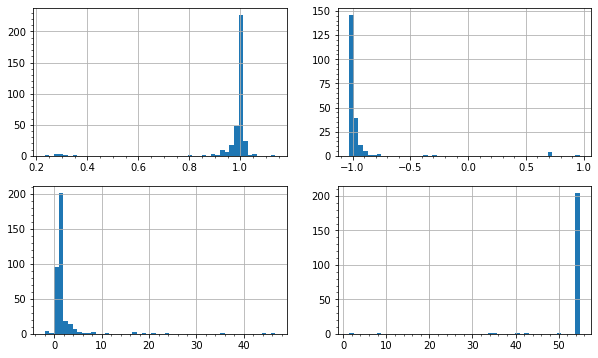

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.hist(Y_ls[Y_o == 1], bins=50)
plt.minorticks_on()
plt.grid(1)
plt.subplot(2,2,2)
plt.hist(Y_ls[Y_o == -1], bins=50)
plt.minorticks_on()
plt.grid(1)
plt.subplot(2,2,3)
plt.hist(Y_agg[Y_o == 1], bins=50)
plt.minorticks_on()
plt.grid(1)
plt.subplot(2,2,4)
plt.hist(Y_agg[Y_o == -1], bins=50)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [15]:
# plt.figure(figsize=(12,10))
# plt.subplot(1,2,1)
# plt.hist2d(Y_o, Y_ls, cmap=plt.cm.Greys, bins=50)
# plt.subplot(1,2,2)
# plt.hist2d(Y_o, Y_agg, cmap=plt.cm.Greys, bins=50)
# plt.show()